# Esercitazione 11
  ## 9 Maggio 2023

Codici per l'interpolazione polinomiale nella forma di Lagrange 

Scrivere la function **interpL** che calcoli
il polinomio interpolante in forma di Lagrange  
Tale function deve assumere come dati in input:
 
 - x vettore dei nodi di interpolazione,
- y vettore dei valori della funzione nei nodi di interpolazione,
- xx vettore dei punti in cui si vuole valutare il polinomio interpolante.
 
In output deve essere restituito yy vettore contenente i valori assunti dal polinomio interpolante.

 
Funzioni Python  utili:
 
-  numpy.poly() restituisce i coefficienti di un polinomio di zeri assegnati,
 - numpy.polyval(p, x)  valuta un polinomio in un punto assegnato.
 
 

In [1]:
import numpy as np

In [3]:
x = np.array([1,2])
coeff = np.poly(x)   #coefficienti del polinomio (x-1)(x-2)
print(coeff)

[ 1. -3.  2.]


In [7]:
def plagr(x,j):
    #x: vettore dei nodi di interpolazione
    xtilde = np.zeros_like(x)
    n = x.shape[0]
    
    if j==0:
        xtilde = x[1:n]
    else:
        xtilde = np.append(x[0:j], x[j+1:n])
        
    num = np.poly(xtilde)
    den = np.polyval(num, x[j])
    coeff = num / den
    return coeff

**Sperimentazione numerica**

 
## Esercizio 1

Si disegnino i grafici dei polinomi di Lagrange associati ai nodi $\{0, 1/4, 1/2, 3/4, 1\}$ e ai nodi $\{-1, -0.7, 0.5, 2\}$.



In [4]:
import matplotlib.pyplot as plt

[0.54373285 0.16752978 0.8043721  0.7330315  0.98156427]


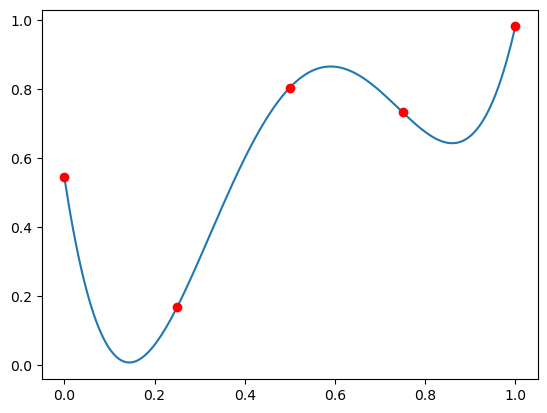

In [45]:
x = np.array([0.0, 1/4, 1/2, 3/4, 1])
n = x.shape[0]
xx = np.linspace(x[0], x[n-1], 200)
M = xx.shape[0]
matL = np.zeros((M, n))

for j in range(n):
    p = plagr(x, j)
    L = np.polyval(p, xx)
    matL[:, j] = L
    #plt.plot(xx, L)
    #plt.plot(x, np.zeros((n,)), 'ro')
    #plt.plot(x[j], 1, 'g*')
    #plt.title("L" + str(j))
    #plt.show()
    #si osserva la proprietà partizione dell'unità, cioè solo una funzione è diversa da 0 (uguale a 1) in ogni punto ed è quella di indice del punto
y = np.random.rand(5)
print(y)
pol = matL@y
plt.plot(xx, pol, x, y, "ro")

## Esercizio 2

Realizzare uno script che calcoli nella forma di Lagrange i polinomi che
interpolano le funzioni test $\sin(x)$ e $\cos(x)$ nei punti $x_k = k \pi/2$, con
$k = 0, 1, 2, 3, 4$. Visualizzare graficamente i polinomi ottenuti insieme
alle funzioni assegnate.




## Esercizio 3
Realizzare uno script python che interpola le coppie $x_i,y_i$, $i=0,\cdots,3$
dove $x_i,i=0,3$ sono punti equidistanti nell' intervallo [-1,1] e $y_i=f(x_i)$ dove $f(x)=3x^3+2x^2+2x-1$ 

[-1.         -0.33333333  0.33333333  1.        ]
[-4.00000000e+00 -1.55555556e+00 -3.33066907e-16  6.00000000e+00]


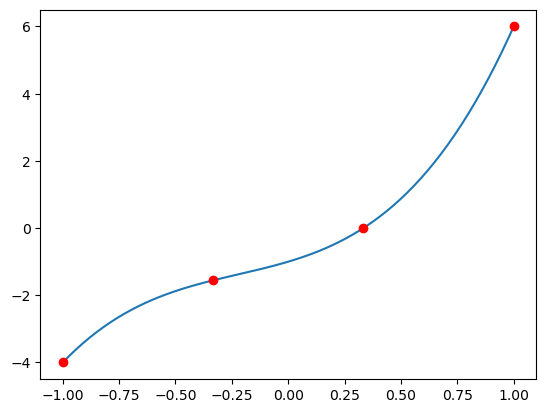

In [66]:
x = np.linspace(-1, 1, 4, endpoint=True)
y = np.zeros_like(x)
print(x)
f_x = lambda x: 3*x**3+2*x**2+2*x-1
for i in range(x.shape[0]):
    y[i] = f_x(x[i])
    
n = x.shape[0]
xx = np.linspace(x[0], x[n-1], 200)
M = xx.shape[0]
matL = np.zeros((M, n))
for j in range(n):
    p = plagr(x, j)
    L = np.polyval(p, xx)
    matL[:, j] = L
    
print(y)
pol = matL@y
plt.plot(xx, pol, x, y, "ro")

## Esercizio 4
La temperatura $T$ in  prossimità  del suolo  subisce una variazione dipendente dalla latitudine $L$ nel seguente modo

L=np.array([-55, -45, -35, -25, -15, -5, 5, 15, 25, 35, 45, 55, 65])

T=np.array([3.7, 3.7,3.52,3.27, 3.2, 3.15, 3.15, 3.25, 3.47, 3.52, 3.65, 3.67, 3.52])


 
- Si vuole costruire un modello che descriva la legge $T = T(L)$ anche per latitudini non misurate. A tal fine si scriva uno script che fornisca la variazione di temperatura alle latitudini $L = \pm 42$ utilizzando il polinomio interpolante. Visualizzare in un grafico i dati assegnati, il polinomio interpolante e le stime di $T$ ottenute per $L = \pm 42$.



## Esercizio 5 

Scrivere uno script che calcoli il polinomio interpolante un insieme di punti $P_i =(x_i, y_i)$ $i = 0, ..., n $ nella forma di Lagrange con $x_i$ scelti dall'utente come:
    - punti equidistanti in un intervallo $[a, b]$,
    - punti definiti dai nodi di Chebyshev nell'intervallo $[a, b]$, ossia
$$
x_i = \frac{(a + b)}{2}+\frac{(b-a)}{2} \, \cos \left(
\frac{(2i+1)\pi}{2(n + 1)}
\right), \quad  i =0, ..., n 
$$
 
  e $y_i = f(x_i)$ ottenuti dalla valutazione nei punti $x_i$ di una funzione test   $f: \ [a, b] \rightarrow {\mathbb R}$. Testare lo script sulle funzioni
 
  - $f(x) = \sin(x)-2 \sin(2x)$,   $ \quad x \in [-\pi,\pi]$,
  -  $f(x) = \sinh(x)$, $ \quad  x \in [-2, 2]$,
  - $f(x) = |x|$,  $ \quad x \in [-1, 1]$,
  - $f(x) = 1/(1+25*x^2)$,  $ \quad x \in [-1, 1]$ (funzione di Runge).

Calcolare l'errore di interpolazione $r(x) = f(x)-p(x)$,
tra la funzione test $f(x)$ e il polinomio di interpolazione $p(x)$.
Visualizzare il grafico di $f(x)$ e $p(x)$, ed il grafico di
$|r(x)|$. Cosa si osserva? Cosa accade all'aumentare del grado $n$ di $p(x)$?
(Si costruisca una tabella che riporti i valori di $\|r(x)\|_{\infty}$ al variare di $n$).



## Esercizio 6

Per $n = 5, 10, 15, 20$ fornire un'approssimazione della costante di Lebesgue scegliendo $x_1, x_2, ..., x_{n+1}$ equispaziati in $[-1, 1]$ oppure coincidenti con i nodi di Chebyshev $x_i = \cos \left(\frac{(2i-1)\pi}{2(n + 1)}  \right)$, $i =1, ..., n + 1$.



## Esercizio 7

Per $n = 5, 10, 15, 20$ fornire un'approssimazione della costante di Lebesgue
scegliendo $x_1, x_2, ..., x_{n+1}$ equispaziati in $[-1, 1]$ oppure coincidenti con
i nodi di Chebyshev $x_i = \cos \left(\frac{(2i-1)\pi}{2(n + 1)}  \right)$, $i =1, ..., n + 1$.

## Esercizio 8

Si interpolino mediante il polinomio $p_{21}(x)$ i 22 punti $(x_i, y_i)$ con $x_i$ equispaziati in $[-1, 1]$ e $y_i = \sin(2 \pi x_i)$. Si considerino poi le ordinate $\tilde{y}_i = y_i + \varepsilon_i$, dove $\varepsilon_i$ denota l'$i$-esima componente del vettore $0.0002*np.random.random(22,)$, e si calcoli il corrispondente
polinomio interpolante $\tilde{p}_{21}(x)$. Si visualizzino e si commentino
i risultati ottenuti, calcolando anche l'errore relativo sul polinomio interpolante
e sui dati.

 